<a href="https://colab.research.google.com/github/Amicable-beep/Amicable-beep/blob/main/WomenEmpowerment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
print('hello world')

hello world


| ID  | Name         | Gender | Age | Program         | Completion\_Status | Score |
| --- | ------------ | ------ | --- | --------------- | ------------------ | ----- |
| 1   | Grace Ajayi  | Female | 24  | Data Analytics  | Completed          | 88    |
| 2   | Musa Bello   | Male   | 26  | Web Development | Dropped            | 52    |
| 3   | Mary Okoro   | Female | 22  | Power Platform  | Completed          | 90    |
| 4   | Ahmed Salisu | Male   | 29  | Data Analytics  | Completed          | 85    |
| 5   | Fatima Dogo  | Female | 20  | Web Development | Completed          | 91    |
| ... | ...          | ...    | ... | ...             | ...                | ...   |


In [4]:
pip pandas

ERROR: unknown command "pandas"


In [5]:
%pip install pandas

In [6]:
%pip install matplotlib

In [7]:
%pip install openpyxl

Gender distribution:
 Gender
Female    3
Male      2
Name: count, dtype: int64

Completion rate by gender (%):
 Gender
Female    100.0
Male       50.0
Name: count, dtype: float64

Analysis complete. Chart and summary exported.


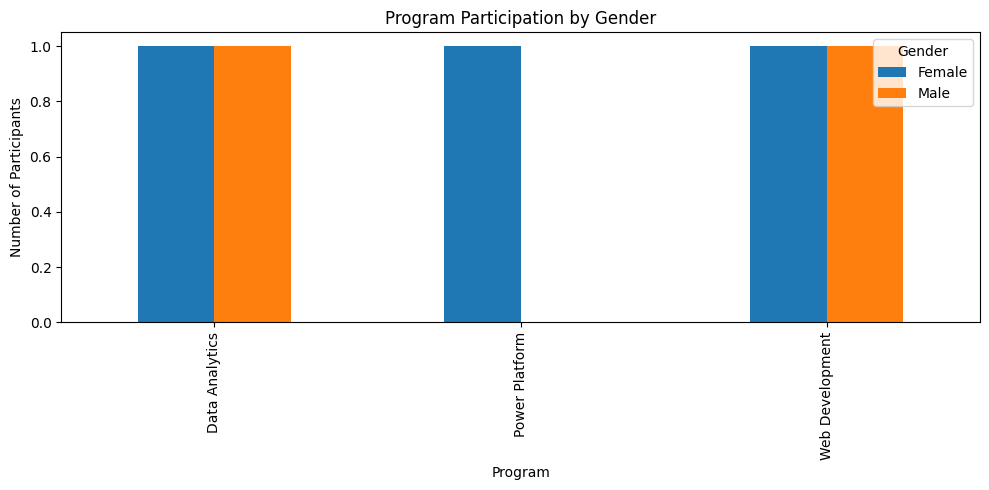

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('gender_participation.csv')

# Clean data
df.dropna(inplace=True)

# Gender distribution
gender_counts = df['Gender'].value_counts()
print("Gender distribution:\n", gender_counts)

# Completion rate by gender
completion = df[df['Completion_Status'] == 'Completed']
completion_rate = completion['Gender'].value_counts() / gender_counts * 100
print("\nCompletion rate by gender (%):\n", completion_rate.round(2))

# Plot participation by program and gender
program_gender = df.groupby(['Program', 'Gender']).size().unstack()
program_gender.plot(kind='bar', title="Program Participation by Gender", figsize=(10, 5))
plt.ylabel("Number of Participants")
plt.tight_layout()
plt.savefig("program_participation_by_gender.png")

# Export Excel summary
summary_df = pd.DataFrame({
    "Total Participants": gender_counts,
    "Completion Rate (%)": completion_rate.round(2)
})
summary_df.to_excel("sdg5_summary.xlsx")

print("\nAnalysis complete. Chart and summary exported.")

In [9]:
import pandas as pd
import io

markdown_table = """
| ID  | Name         | Gender | Age | Program         | Completion_Status | Score |
| --- | ------------ | ------ | --- | --------------- | ------------------ | ----- |
| 1   | Grace Ajayi  | Female | 24  | Data Analytics  | Completed          | 88    |
| 2   | Musa Bello   | Male   | 26  | Web Development | Dropped            | 52    |
| 3   | Mary Okoro   | Female | 22  | Power Platform  | Completed          | 90    |
| 4   | Ahmed Salisu | Male   | 29  | Data Analytics  | Completed          | 85    |
| 5   | Fatima Dogo  | Female | 20  | Web Development | Completed          | 91    |
"""

# Read the markdown table into a pandas DataFrame
df = pd.read_csv(io.StringIO(markdown_table), sep='|', skiprows=[2], skipinitialspace=True)

# Drop the first and last columns which are empty due to the markdown table format
df = df.iloc[:, 1:-1]

# Trim leading/trailing whitespace from column names and data
df.columns = df.columns.str.strip()
for col in df.columns:
    df[col] = df[col].astype(str).str.strip()

# Save the DataFrame to a CSV file
df.to_csv('gender_participation.csv', index=False)

print("gender_participation.csv created successfully.")

gender_participation.csv created successfully.
